In [1]:
# Import the modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data_df = pd.read_csv('Resources/lending_data.csv')

# Review the DataFrame
lending_data_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the y variable, the labels
y = lending_data_df["loan_status"]

# Separate the X variable, the features
X = lending_data_df.drop(columns="loan_status")

In [4]:
# Review the y variable Series
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head(10)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
5,10100.0,7.438,50600,0.407115,4,1,20600
6,10300.0,7.490,51100,0.412916,4,1,21100
7,8800.0,6.857,45100,0.334812,3,0,15100
8,9300.0,7.096,47400,0.367089,3,0,17400
9,9700.0,7.248,48800,0.385246,4,0,18800


In [6]:
# Check the number of 0's and 1's value in loan status y df.
# Loan value = 0; loan is healthy
# Loan value = 1; loan has high risk of defaulting
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(random_state=1)

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [25]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions)



array([[18679,    80],
       [   67,   558]], dtype=int64)

In [12]:
# Print the classification report for the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.89      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model is able to predict a healthy loan ("0" rating), than a high-risk loan ("1" rating) due to the 30:1 ratio between 0's to 1's, although at the 25% of the test data, the model has predicted at 94% accuracy. 

It is also recommended to train the data on another model - random forest classifier, to see if this accuracy is still in comparison with the logistic regression model. 

## Create a RandomForestClassifier Model with the Original Data - this is for comparison purposes

In [14]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [15]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Import the RandomForestClassifier module from SKLearn
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier model
# Assign a random_state parameter of 1 to the model
random_forest = RandomForestClassifier(n_estimators=500, random_state=78)

# Fit the model using training data
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=500, random_state=78)

In [17]:
# Make a prediction using the testing data
predictions_rf = random_forest.predict(X_test_scaled)

In [18]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions_rf)

array([[18681,    78],
       [   74,   551]], dtype=int64)

In [20]:
# Print the classification report for the model
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.88      0.88      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [22]:
# Random Forests in sklearn will automatically calculate feature importance
importances = random_forest.feature_importances_
# We can sort the features by their importance
sorted(zip(random_forest.feature_importances_, X.columns), reverse=True)

[(0.29228463745184435, 'interest_rate'),
 (0.1771686892916899, 'borrower_income'),
 (0.17492864783950793, 'debt_to_income'),
 (0.174915093387146, 'total_debt'),
 (0.12227416061998739, 'loan_size'),
 (0.058320231984505436, 'num_of_accounts'),
 (0.0001085394253188139, 'derogatory_marks')]

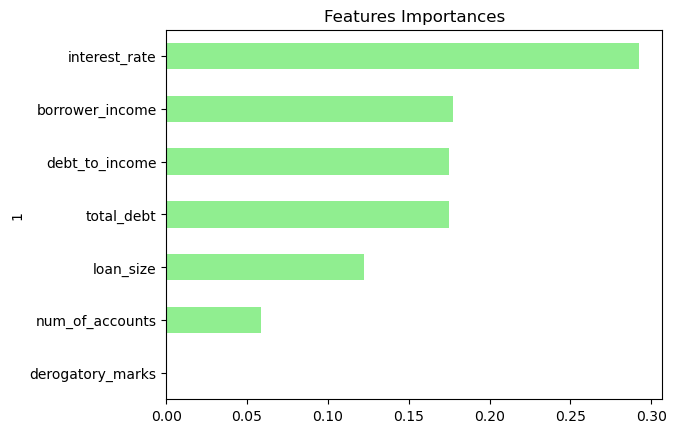

In [23]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(random_forest.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

plt.savefig('Images/feature_importance.png')

**Conclusion:** Performing the random forest classifier model to this dataset maintained the same f-1 scores and accuracy of the initial model (logistic regresion), which both yields f-1 score of 0.84 and accuracy of 94%. However, looking at the each feature importance, the "derogatory marks" (borrower specific feature) is not relevant for this model. The interest rate is highly relevant in determining the default risk to the borrowers. 